<p style="text-align: center;"><img src="https://lms.techproeducation.com/pluginfile.php/1/theme_edumy/headerlogo2/1663129929/logo.png" class="img-fluid" alt="CLRSWY"></p>

# WITH SEABORN

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter
import warnings
warnings.filterwarnings('ignore') 

INSTRUCTIONS
1. Box and Swarm Plots in kill data
1. Most dangerous cities
1. Most dangerous states
1. Having mental ilness or not for killed people
1. Threat types
1. Flee types
<br>

## read data

if didn't work you can use this parameters: encoding="windows-1252"

In [8]:
kill = pd.read_csv("PoliceKillingsUS.csv", encoding = "windows-1252")
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


## Shape

In [9]:
kill.shape

(2535, 14)

(2535, 14)

## 1a: Box plot of age in both genders separeted by manner of death.

In [10]:
kill.manner_of_death.unique()

array(['shot', 'shot and Tasered'], dtype=object)

array(['shot', 'shot and Tasered'], dtype=object)

#### INSTRUCTION: Demonstrate the Qurtiles of age in both genders separeted by manner of death.**

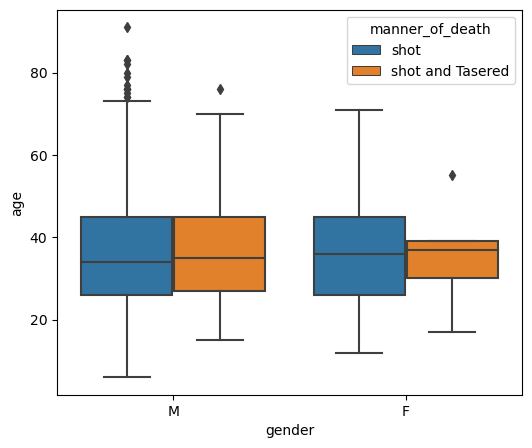

In [29]:
kill.dropna(inplace=True)
fig, ax = plt.subplots(figsize = (6, 5))
sns.boxplot(data = kill, x = "gender", y = "age", hue = "manner_of_death");

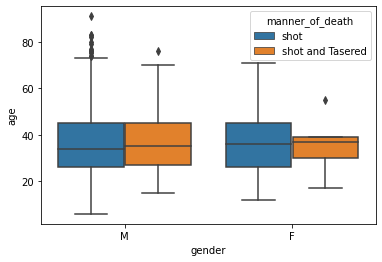

In [ ]:
# with seaborn

## 1b: Swarm Plot 

#### INSTRUCTION: Demonstrate the age in both genders separeted by manner of death by a swarm plot.**

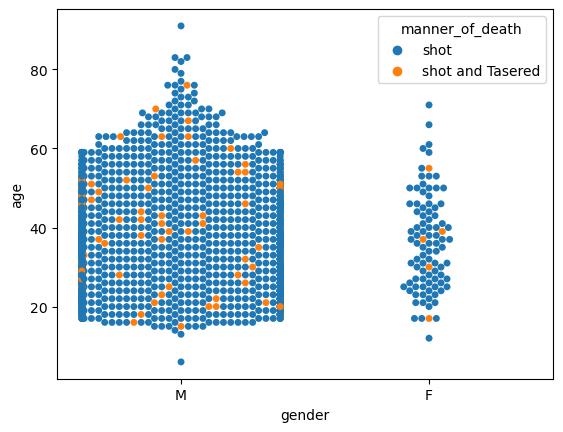

In [28]:
sns.swarmplot(data = kill, x = "gender", y = "age", hue = "manner_of_death");

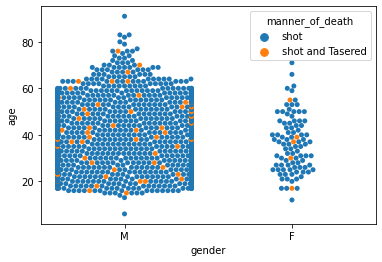

In [ ]:
# with seaborn

## 2: Plot 12 most dangerous cities

In [41]:
most_dangerous_cities = kill["city"].value_counts().head(12)
most_dangerous_cities

Los Angeles     35
Phoenix         28
Houston         24
Chicago         22
Austin          18
Las Vegas       17
Columbus        16
Miami           15
San Antonio     15
Indianapolis    14
St. Louis       14
Bakersfield     13
Name: city, dtype: int64

Los Angeles      35
Phoenix          28
Houston          24
Chicago          22
Austin           18
Las Vegas        17
Columbus         16
Miami            15
San Antonio      15
St. Louis        14
Indianapolis     14
Oklahoma City    13
Name: city, dtype: int64

In [46]:
most_dangerous_cities.values

array([35, 28, 24, 22, 18, 17, 16, 15, 15, 14, 14, 13], dtype=int64)

array([35, 28, 24, 22, 18, 17, 16, 15, 15, 14, 14, 13])

In [45]:
most_dangerous_cities.index

Index(['Los Angeles', 'Phoenix', 'Houston', 'Chicago', 'Austin', 'Las Vegas',
       'Columbus', 'Miami', 'San Antonio', 'Indianapolis', 'St. Louis',
       'Bakersfield'],
      dtype='object')

Index(['Los Angeles', 'Phoenix', 'Houston', 'Chicago', 'Austin', 'Las Vegas',
       'Columbus', 'Miami', 'San Antonio', 'St. Louis', 'Indianapolis',
       'Oklahoma City'],
      dtype='object')

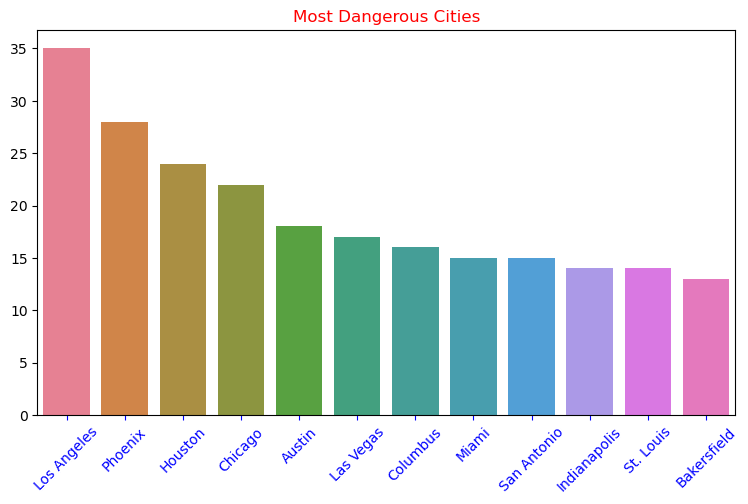

In [79]:
fig, ax = plt.subplots(figsize = (9, 5))
sns.barplot(x = most_dangerous_cities.index, y = most_dangerous_cities.values,
           palette="husl")
plt.xticks(rotation=45)
ax.tick_params(axis='x', colors='blue')
ax.set_title("Most Dangerous Cities", color = "red");

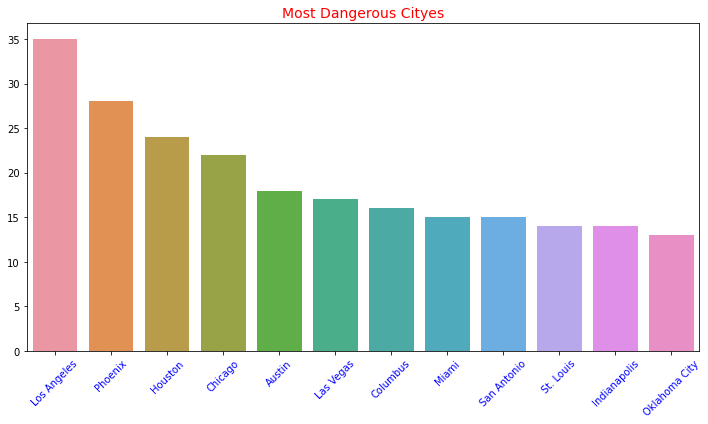

In [ ]:
# with seaborn

In [80]:
most_dangerous_cities

Los Angeles     35
Phoenix         28
Houston         24
Chicago         22
Austin          18
Las Vegas       17
Columbus        16
Miami           15
San Antonio     15
Indianapolis    14
St. Louis       14
Bakersfield     13
Name: city, dtype: int64

Los Angeles      35
Phoenix          28
Houston          24
Chicago          22
Austin           18
Las Vegas        17
Columbus         16
Miami            15
San Antonio      15
St. Louis        14
Indianapolis     14
Oklahoma City    13
Name: city, dtype: int64

In [153]:
most_dangerous_cities.index

Index(['Los Angeles', 'Phoenix', 'Houston', 'Chicago', 'Austin', 'Las Vegas',
       'Columbus', 'Miami', 'San Antonio', 'Indianapolis', 'St. Louis',
       'Bakersfield'],
      dtype='object')

Index(['Los Angeles', 'Phoenix', 'Houston', 'Chicago', 'Austin', 'Las Vegas',
       'Columbus', 'Miami', 'San Antonio', 'Indianapolis', 'St. Louis',
       'Bakersfield'],
      dtype='object')

In [128]:
kill2 = pd.DataFrame() #yeni bir df tanımladım, bu df en yüksek ölüm olan 12 şehirden oluşuyor.
for i in range(len(kill)):
    if kill.iloc[i].city in most_dangerous_cities.index:
        kill2 = kill2.append(kill.iloc[i], ignore_index = True)  

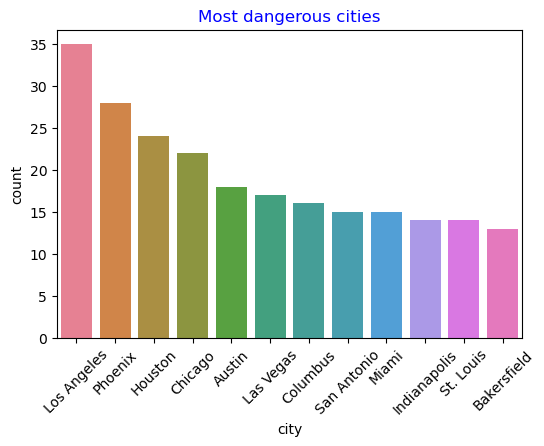

In [196]:
fig, ax = plt.subplots(figsize = (6, 4))

sns.countplot(data = kill2, x = "city", palette="husl", order = kill2['city'].value_counts().index)

plt.xticks(rotation=45)
ax.set_title("Most dangerous cities", color = "blue");

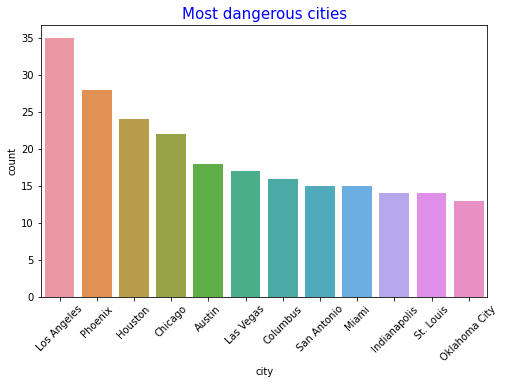

In [ ]:
# with seaborn countplot


## 3: Plot 20 most dangerous states

In [137]:
most_dangerous_states = kill["state"].value_counts().head(20)
most_dangerous_states

CA    366
TX    200
FL    136
AZ    105
OH     70
NC     66
OK     65
CO     63
GA     61
MO     58
TN     56
IL     56
WA     51
LA     47
AL     45
PA     45
NY     43
VA     43
WI     42
NM     41
Name: state, dtype: int64

CA    366
TX    200
FL    136
AZ    105
OH     70
NC     66
OK     65
CO     63
GA     61
MO     58
TN     56
IL     56
WA     51
LA     47
AL     45
PA     45
VA     43
NY     43
WI     42
NM     41
Name: state, dtype: int64

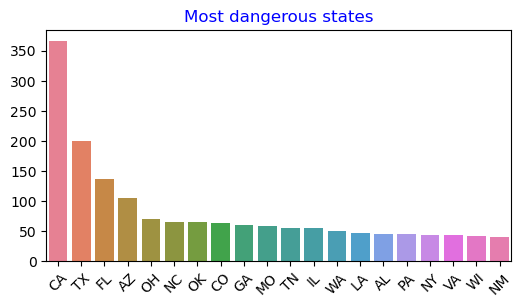

In [141]:
fig, ax = plt.subplots(figsize = (6, 3))
sns.barplot(x = most_dangerous_states.index, y = most_dangerous_states.values,
           palette="husl")
plt.xticks(rotation=45)

ax.set_title("Most dangerous states", color = "blue");

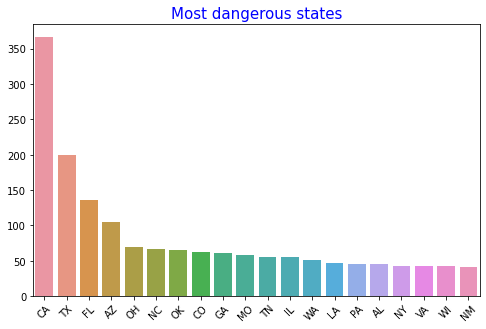

In [ ]:
# with seaborn barplot

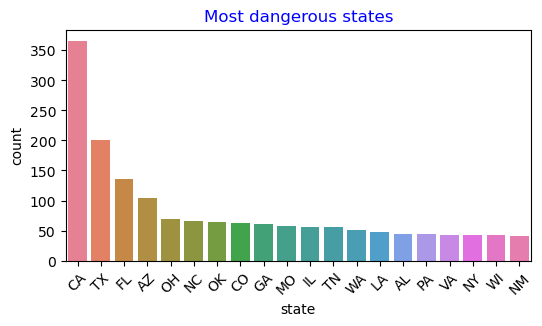

In [166]:
fig, ax = plt.subplots(figsize = (6, 3)) # Bu yol ise data üzerinde koşul sağlayarak yeni bir df oluşturmadan yapma.
sns.countplot(data = kill[kill.state.isin(most_dangerous_states.index)], x = "state", 
              palette="husl", order = kill[kill.state.isin(most_dangerous_states.index)]['state'].value_counts().index)

plt.xticks(rotation=45)
ax.set_title("Most dangerous states", color = "blue");

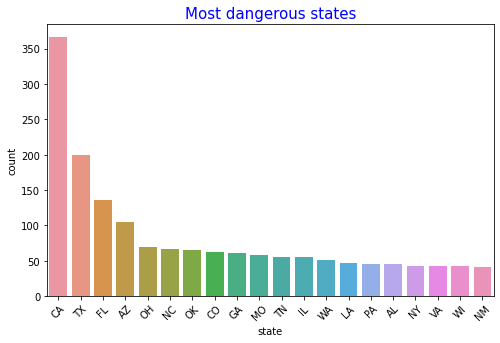

In [ ]:
# with seaborn countplot

## 4: Plot Having mental ilness or not for killed people

In [168]:
kill.head(2)

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False


,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False


In [172]:
mental = kill.signs_of_mental_illness.value_counts()
mental

False    1681
True      573
Name: signs_of_mental_illness, dtype: int64

False    1681
True      573
Name: signs_of_mental_illness, dtype: int64

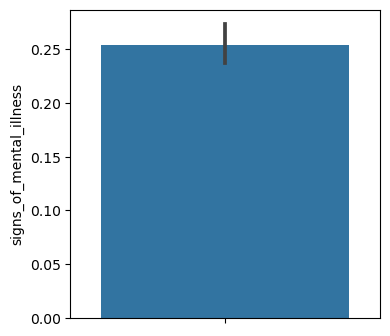

In [171]:
fig, ax = plt.subplots(figsize = (4, 4))
sns.barplot(data = kill ,y = "signs_of_mental_illness");

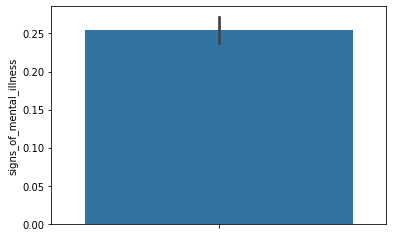

In [142]:
#with seaborn barplot

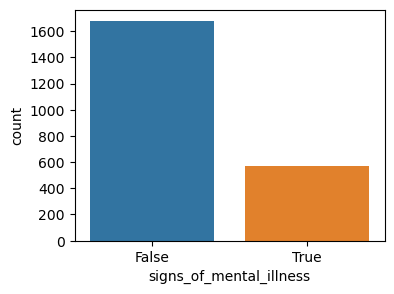

In [183]:
fig, ax = plt.subplots(figsize = (4, 3))
sns.barplot(x = mental.index, y = mental.values)
ax.set(xlabel = "signs_of_mental_illness", ylabel="count")
plt.yticks(np.arange(0, 1700, 200));

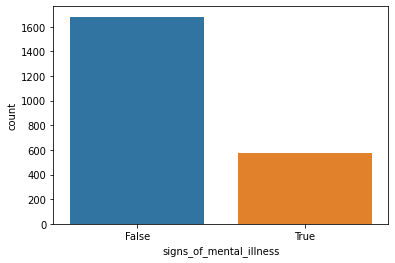

In [ ]:
# with seaborn

## 5: Plot number of Threat Types

In [191]:
threat = kill.threat_level.value_counts()
threat

attack          1462
other            677
undetermined     115
Name: threat_level, dtype: int64

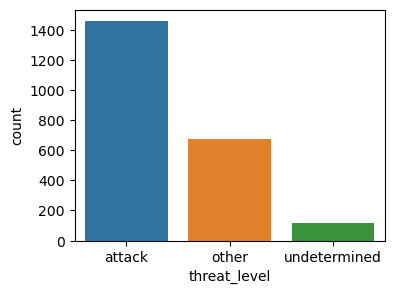

In [192]:
fig, ax = plt.subplots(figsize = (4, 3))
sns.barplot(x = threat.index, y = threat.values)
ax.set(xlabel = "threat_level", ylabel="count")
plt.yticks(np.arange(0, 1500, 200));

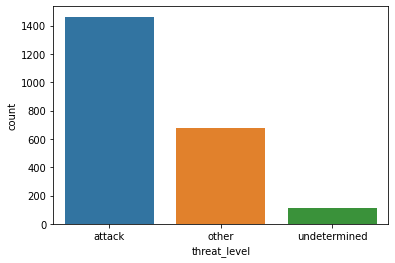

In [ ]:
# with seaborn

## 6: Plot number of Flee Types

In [193]:
flee_type = kill.flee.value_counts()
flee_type

Not fleeing    1528
Car             360
Foot            278
Other            88
Name: flee, dtype: int64

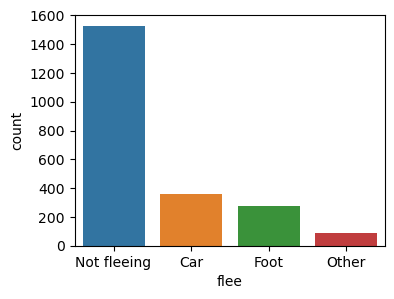

In [197]:
fig, ax = plt.subplots(figsize = (4, 3))
sns.barplot(x = flee_type.index, y = flee_type.values)
ax.set(xlabel = "flee", ylabel="count")
plt.yticks(np.arange(0, 1700, 200));

# Congratulations

<p style="text-align: center;"><img src="https://lms.techproeducation.com/pluginfile.php/1/theme_edumy/headerlogo2/1663129929/logo.png" class="img-fluid" alt="CLRSWY"></p>